In [1]:
# needed imports
import numpy as np
import os
import cv2
from scipy.misc import imresize

# deep learning library
import keras
from keras.layers import Input
from keras.utils.training_utils import multi_gpu_model

# allow memmory dynamic memmory allocation
# import tensorflow as tf
# from keras.backend.tensorflow_backend import set_session
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
# config.log_device_placement = True  # to log device placement (on which device the operation ran)
# sess = tf.Session(config=config)
# set_session(sess)  # set this TensorFlow session as the default session for Keras

# plotting images
import matplotlib.pyplot as plt

from create_model import createVGG16, createVGGskip, createVGGskip_2, createUnet

Using TensorFlow backend.


In [2]:
# numpy array containing all the classes
#class_labels = np.array((33, 34, 35, 36, 38, 39, 40, 0))
class_labels = np.array((33, 0))

In [3]:
# since we are going to segment the image, the input should not have any dimension
x_in = Input(shape=(None, None, 3))

vgg_16_new = createVGGskip_2(x_in)
#vgg_16_new = createVGG16(x_in)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, None, None, 6 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, None, None, 6 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

/home/pabloleo96/MLiP2/create_model.py:201: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
  vgg_16_new = Model(input = in_t, output = x_out)


In [4]:
# model name
model_name = 'best_model_vgg_8c-only_cars.h5'
#model_name = 'best_model_unet-only_cars.h5'
result_dir = './results'
vgg_16_multi = multi_gpu_model(vgg_16_new, gpus = 2)
vgg_16_multi.load_weights(os.path.join(result_dir, model_name))

In [5]:
# file_dir_or = './data/full_data'
# filelist_x_or = np.array(sorted(os.listdir(os.path.join(file_dir_or, 'train_color'))))
# filelist_y_or = np.array(sorted(os.listdir(os.path.join(file_dir_or, 'train_label'))))

# n = 10

# file_x_original = []
# file_y_original = []
# for i in range(n):
#     file_x_original.append(np.pad(np.array(cv2.imread(os.path.join(file_dir_or, 'train_color', filelist_x_or[500+i]), -1))/255,((0,10),(0,8),(0,0)), 'constant', constant_values = 0))
#     file_y_original.append(np.pad(np.array(cv2.imread(os.path.join(file_dir_or, 'train_label', filelist_y_or[500+i]), -1)),((0,10),(0,8)), 'constant', constant_values = 0))

# file_x_original = np.array(file_x_original)
# file_y_original = np.array(file_y_original)
# file_y_pred = vgg_16_multi.predict(file_x_original[:,1500:2012,0:2048,:], batch_size=1)

# #file_y_pred[file_y_pred > 0.4] = 1
# #file_y_pred[file_y_pred < 0.4] = 0

# for i in range(n):
#     plt.figure(figsize = (15,12))
#     plt.subplot(2,3,1)
#     plt.imshow(file_x_original[i,1500:2012,0:2048,:]); plt.title('original_color')
#     plt.subplot(2,3,2)
#     plt.imshow(file_y_original[i,1500:2012,0:2048]); plt.title('original_label')
#     plt.subplot(2,3,3)
#     plt.imshow(np.argmax(file_y_pred[i], axis=-1)); plt.title('predicted_label')
# plt.show()

Starting prediction
Number of predicted images: 0 out of 1917


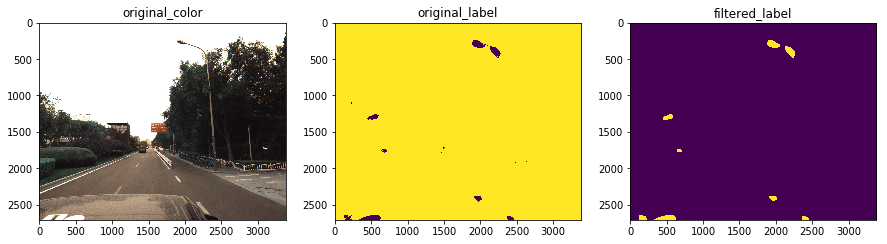

Starting prediction
Number of predicted images: 1 out of 1917


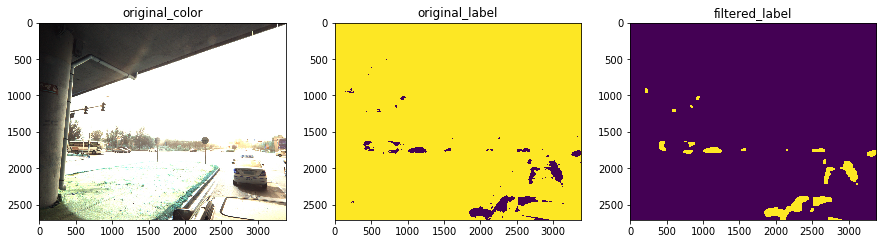

Starting prediction
Number of predicted images: 2 out of 1917


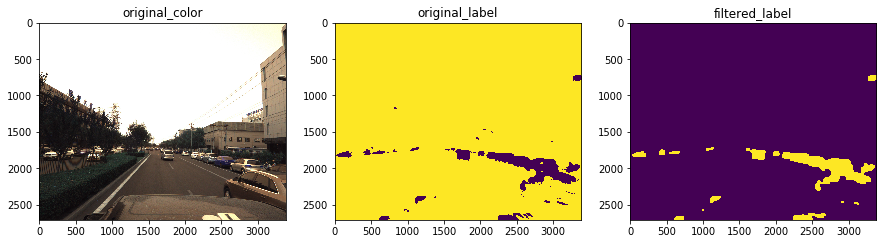

Starting prediction
Number of predicted images: 3 out of 1917


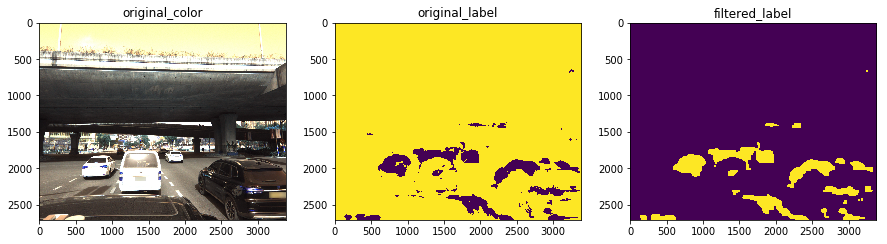

KeyboardInterrupt: 

In [6]:
from create_submissionAlessandro import CreateSubmission

test_dir = './data/full_data/test'
CreateSubmission(vgg_16_new, test_dir)